#Posttest 6

*Library yang di gunakan*

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt


Muat kumpulan data

In [80]:
df = pd.read_csv('Loan_default.csv',low_memory=False)

In [81]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


Hapus kolom 'LoanID'

In [82]:
df = df.drop(columns=['LoanID'])

Memisahkakn fitur dan variabel target

In [83]:
X = df.drop(columns=['CreditScore'])
y = df['CreditScore']

memisahkan kumpulan data menjadi kumpulan pelatihan dan pengujian

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Prapemrosesan: Pengkodean one-hot untuk atribut kategorikal, Normalisasi untuk atribut numerik

In [85]:
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=[np.object]).columns

<ipython-input-85-cacf34294f41>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = X.select_dtypes(include=[np.object]).columns


Membuat transformers

In [87]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

Membuat preprocessor

In [88]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Proses awal data pelatihan

In [89]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [90]:
X_test_preprocessed = preprocessor.transform(X_test)

Bangun model sekuensial

In [91]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_preprocessed.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

Kompilasi model

In [92]:
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mae'])

tentukan callbacks

In [93]:
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [94]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_preprocessed.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

In [95]:
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mae'])


In [96]:
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)


Melatih Model

In [97]:
history = model.fit(
    X_train_preprocessed, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50
5107/5107 [==============================] - 13s 2ms/step - loss: 47226.2578 - mae: 173.2674 - val_loss: 25855.8574 - val_mae: 138.7065
Epoch 2/50
  80/5107 [..............................] - ETA: 9s - loss: 38036.9258 - mae: 162.0455

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5107/5107 [==============================] - 12s 2ms/step - loss: 36478.8711 - mae: 158.0876 - val_loss: 25943.7031 - val_mae: 138.8130
Epoch 3/50
5107/5107 [==============================] - 12s 2ms/step - loss: 36062.5664 - mae: 157.2086 - val_loss: 25577.1133 - val_mae: 138.1812
Epoch 4/50
5107/5107 [==============================] - 13s 3ms/step - loss: 35541.0625 - mae: 156.3919 - val_loss: 25591.7695 - val_mae: 138.1899
Epoch 5/50
5107/5107 [==============================] - 12s 2ms/step - loss: 35162.1211 - mae: 155.4243 - val_loss: 25538.2656 - val_mae: 138.1428
Epoch 6/50
5107/5107 [==============================] - 12s 2ms/step - loss: 34877.1016 - mae: 155.0132 - val_loss: 25348.9395 - val_mae: 137.8047
Epoch 7/50
5107/5107 [==============================] - 12s 2ms/step - loss: 34254.8633 - mae: 153.9201 - val_loss: 25414.6855 - val_mae: 137.9201
Epoch 8/50
5107/5107 [==============================] - 13s 3ms/step - loss: 33625.4414 - mae: 152.7300 - val_loss: 25458.9570 - 

Evaluasi model

In [98]:
y_pred = model.predict(X_test_preprocessed)

1596/1596 [==============================] - 2s 1ms/step


Evaluasi menggunakan R-kuadrat

In [99]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: -0.0026641664830315825


Merencanakan history pelatihan

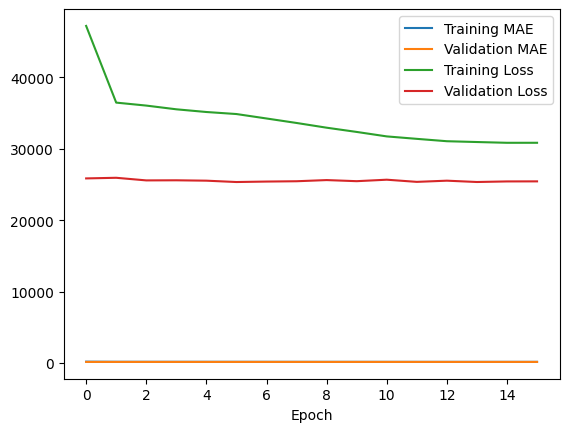

In [100]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.show()